 # Predict whether income exceeds $50K/yr based on census data

In [1]:
# importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Data reading
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
Data = pd.read_csv('adult.data', names = columns)

In [3]:
df=Data.copy()

In [4]:
# shape
df.shape

(32561, 15)

In [5]:
df.size

488415

In [6]:
df.head()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset contains 32560 instances of 15 features

In [9]:
df.nunique()

Age                    73
Work Class              9
Final Weight        21648
Education              16
Education Number       16
Marital Status          7
Occupation             15
Relationship            6
Race                    5
Sex                     2
Capital Gain          119
Capital Loss           92
Hours per Week         94
Country                42
Income                  2
dtype: int64

In [10]:
df['Work Class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
df['Education Number'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [13]:
df['Marital Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [14]:
df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
df['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [17]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [18]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

### Attribute Information: 

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* class: >50K, <=50K


In [19]:
df.isnull().sum()

Age                 0
Work Class          0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per Week      0
Country             0
Income              0
dtype: int64

In [20]:
count_country = df['Country'].value_counts()
count_country

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### Deal with missing data

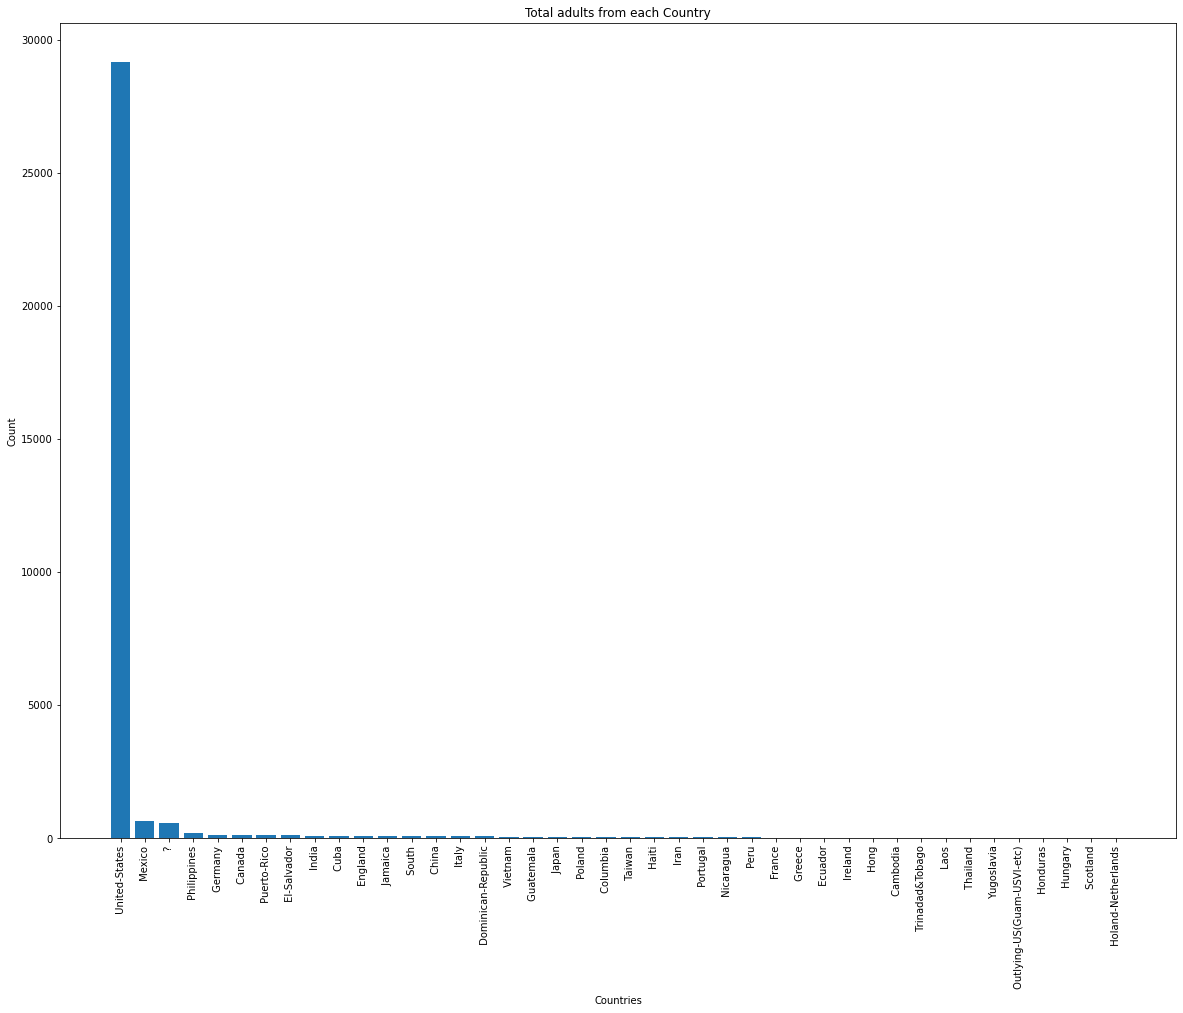

In [21]:
plt.figure(figsize=(20,15))
plt.bar(count_country.index, count_country.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country');

##### There are two things that I noticed:

* There are some missing values in Country column denoted by ?. As they are very less, I'll drop these rows.
* The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other.

In [22]:
df = df.drop(df[df['Country'] == ' ?'].index)
countries = np.array(df['Country'].unique())
countries = np.delete(countries, 0)
df['Country'].replace(countries, 'Other', inplace = True);

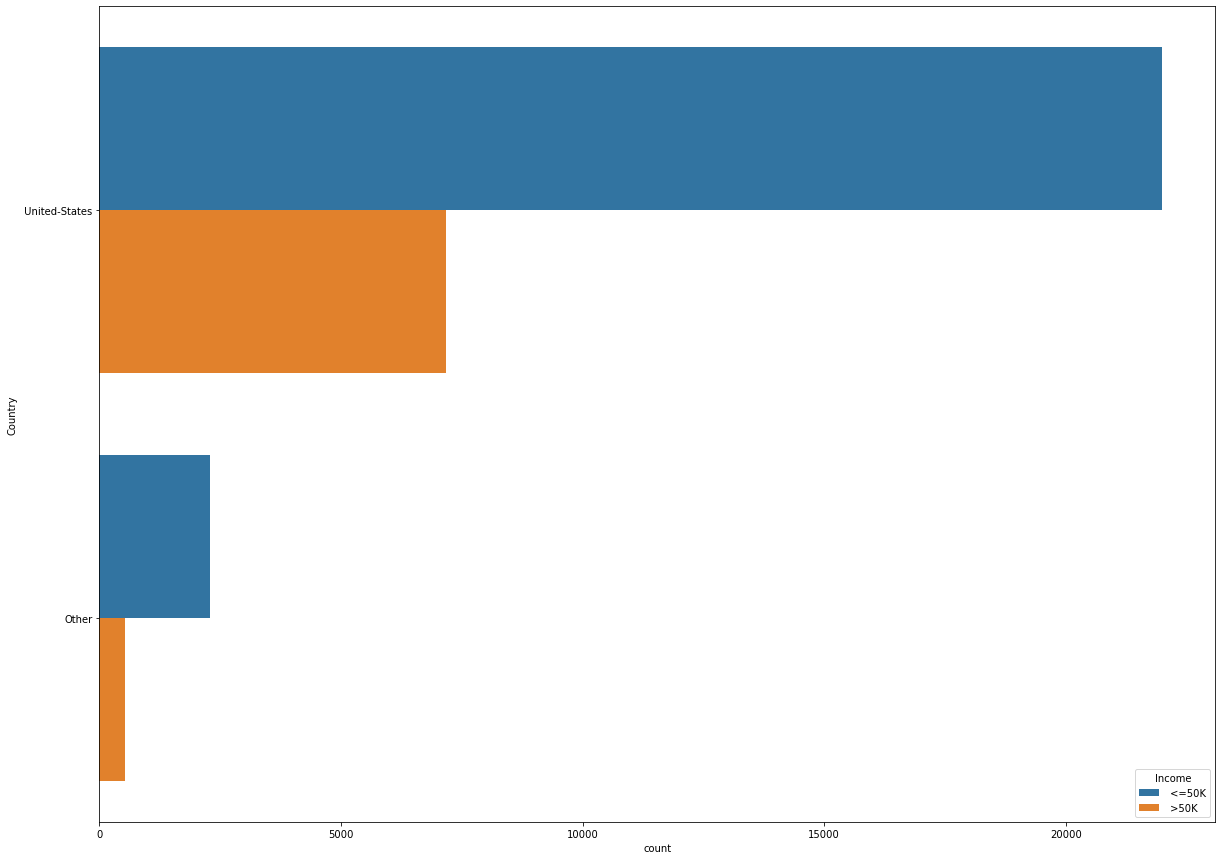

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(y = 'Country', hue = 'Income', data = df);

## Univariate Analysis

In [24]:
df.describe()

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week
count,31978.000000,3.197800e+04,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1.897141e+05,10.071236,1064.360623,86.739352,40.417850
std,13.662085,1.057255e+05,2.560667,7298.596271,401.594301,12.345285
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176202e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.373790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The features are not on the same scale. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

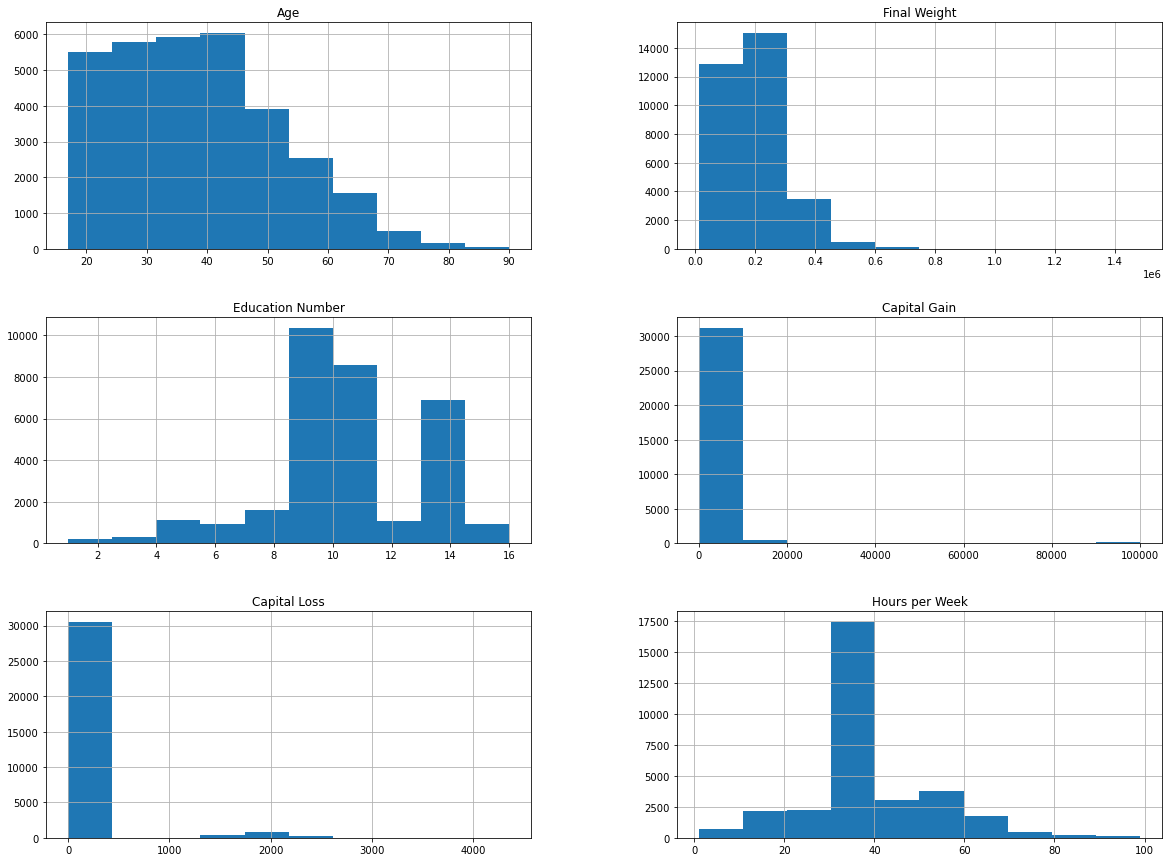

In [25]:
df[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist(figsize=(20,15));

##### From the histograms above, we can visualized that:

* I can group the Age column into bins.
* For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.
* We need to analyse Education Number further as it might align with Education information.
* Final Weight is also left skewed.
* The Hours per Week is normally Distributed.

### Count of the Target Column

In [26]:
df['Income'].value_counts()

 <=50K    24283
 >50K      7695
Name: Income, dtype: int64

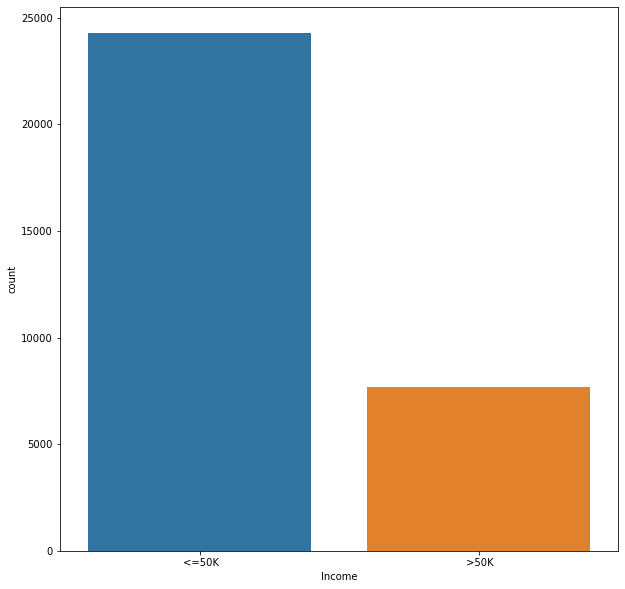

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income',data=df); 

# Bivariate Analysis

In [28]:
# correlation
df.corr()

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week
Age,1.000000,-0.076704,0.036614,0.077490,0.057282,0.068299
Final Weight,-0.076704,1.000000,-0.044256,0.001087,-0.010139,-0.018885
Education Number,0.036614,-0.044256,1.000000,0.122736,0.080565,0.149417
Capital Gain,0.077490,0.001087,0.122736,1.000000,-0.031499,0.079112
Capital Loss,0.057282,-0.010139,0.080565,-0.031499,1.000000,0.053106
Hours per Week,0.068299,-0.018885,0.149417,0.079112,0.053106,1.000000


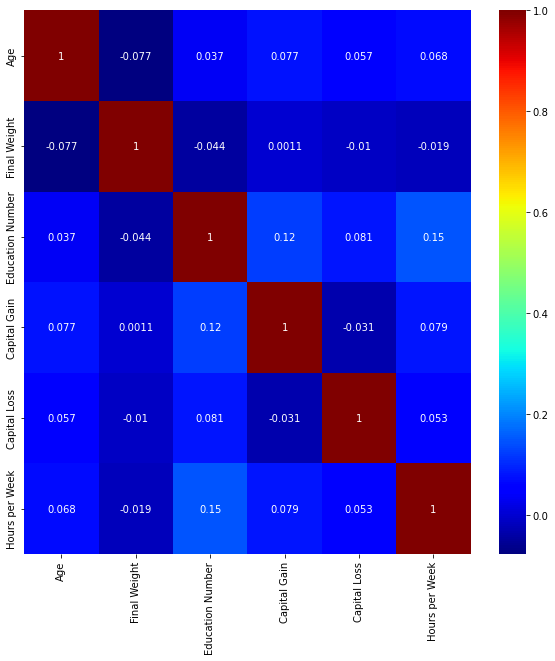

In [29]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="jet",annot=True);

<Figure size 1440x1440 with 0 Axes>

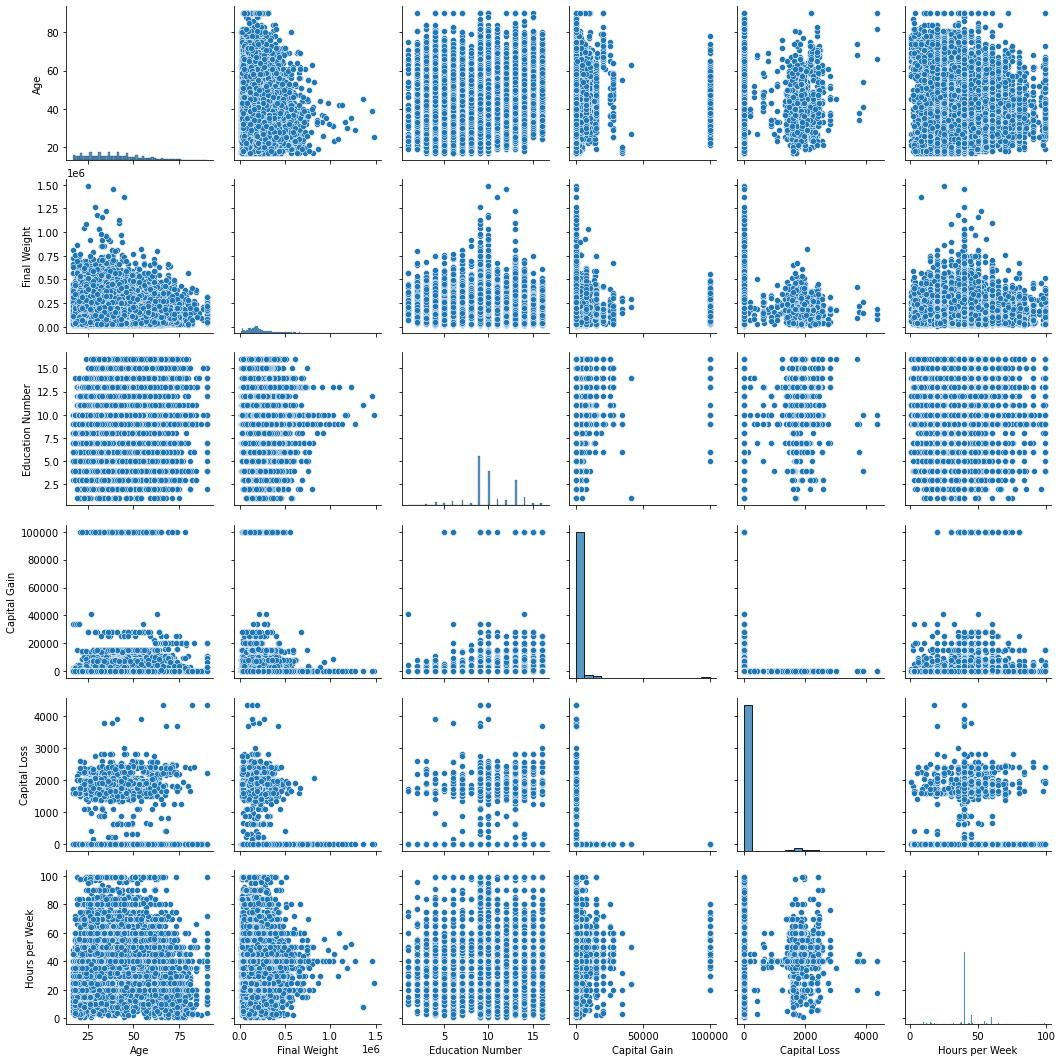

In [30]:
#pairplot
plt.figure(figsize=(20,20))
sns.pairplot(df);

### Now, I'll analyze the categorical features using CountPlot comparison with Income.

### Age
Here, I'll bucket the age into separate bins.

* 0-25: Young
* 25-50: Adult
* 50-100: Old

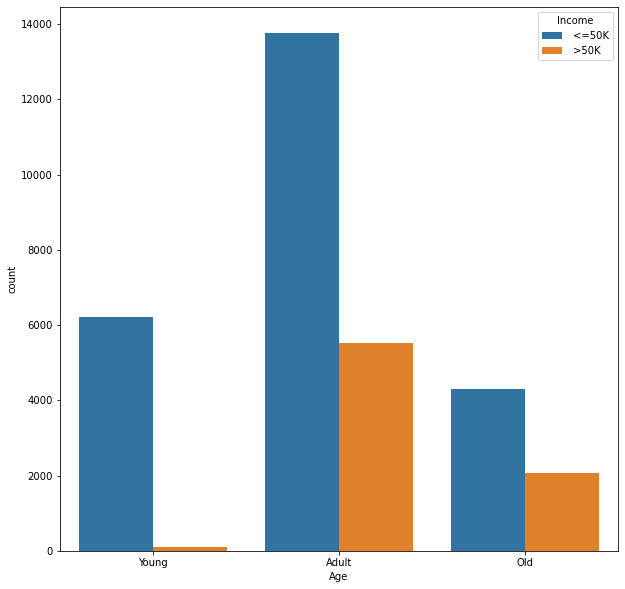

In [31]:
df['Age']=pd.cut(df['Age'],bins=[0,25,50,100],labels=['Young', 'Adult', 'Old'])
plt.figure(figsize=(10,10))
sns.countplot(x='Age',hue='Income',data=df);

from above countplot we can see that there are relatively less Young people who have an income more than $50K.

### Capital Gain and Capital Loss
In dataset having both Capital Gain and Capital Loss, I will use their difference as that is more relevant and gives the change.

In [32]:
df['Capital Diff'] = df['Capital Gain'] - df['Capital Loss']
df.drop(['Capital Gain'], axis = 1, inplace = True)
df.drop(['Capital Loss'], axis = 1, inplace = True)

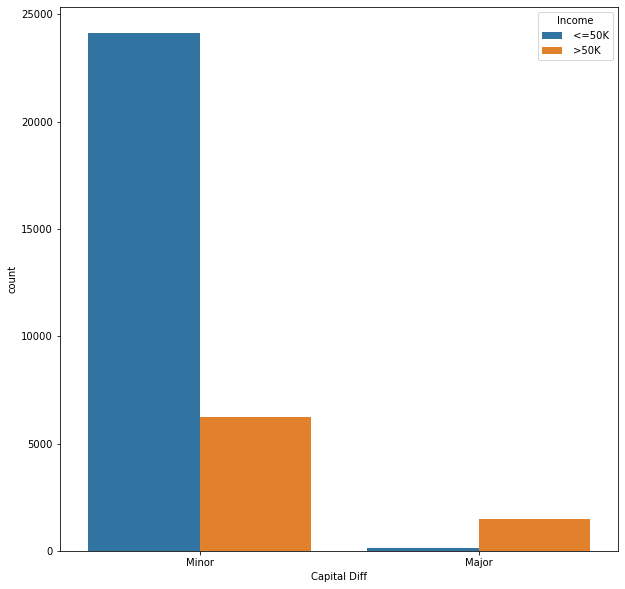

In [33]:
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
plt.figure(figsize=(10,10))
sns.countplot(x = 'Capital Diff', hue = 'Income', data = df);

### Hours per Week
Taking a look at the histogram for Hours per Week, I can see that the dataset is aligned around the center. I can still create buckets from this data. As usually, the work hours are close to 30-40 hours, I create the buckets as 0-30, 30-40, and 40-100.

<AxesSubplot:xlabel='Hours per Week', ylabel='count'>

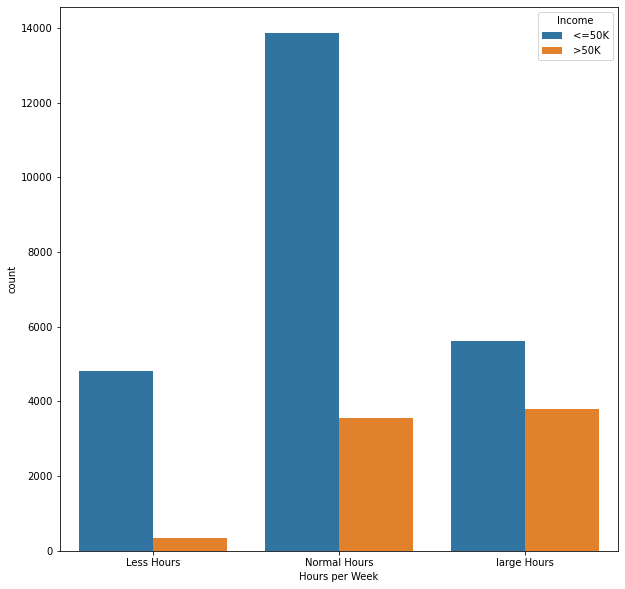

In [34]:
df['Hours per Week'] = pd.cut(df['Hours per Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Less Hours', 'Normal Hours', 'large Hours'])
plt.figure(figsize=(10,10))
sns.countplot(x = 'Hours per Week', hue = 'Income', data = df)

Look at the graph above, As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less.

### Work Class

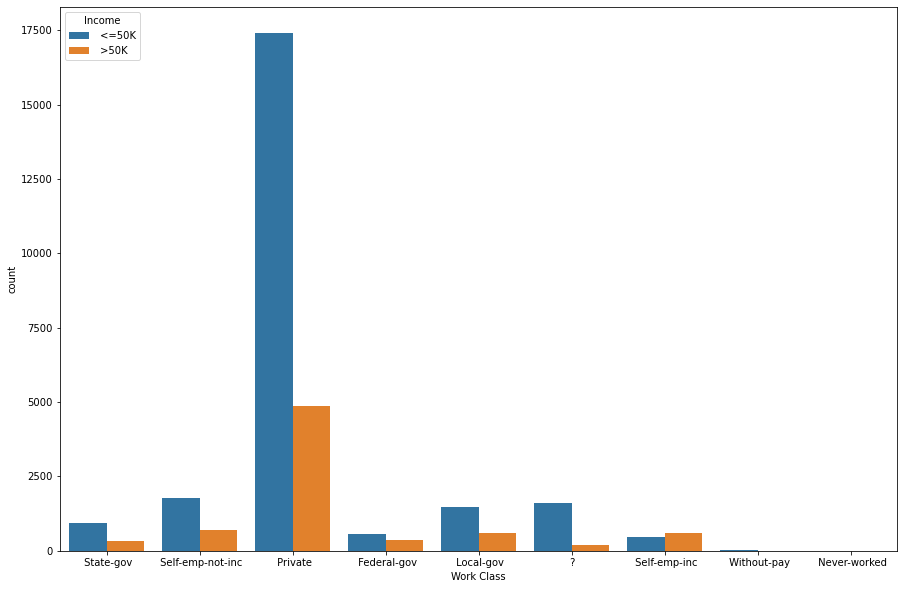

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Work Class', hue = 'Income', data = df);

From above graph, I can see that in private sector there are more people. I also see that there are Work Class values defined as ? which appears to be error data. As it is very less, thus i will simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too.

In [36]:
df = df.drop(df[df['Work Class'] == ' ?'].index)
df = df.drop(df[df['Work Class'] == ' Without-pay'].index)
df = df.drop(df[df['Work Class'] == ' Never-worked'].index)

### Marital Status and Relationship

In [37]:
df['Marital Status'].value_counts()

 Married-civ-spouse       14057
 Never-married             9722
 Divorced                  4214
 Separated                  939
 Widowed                    826
 Married-spouse-absent      369
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

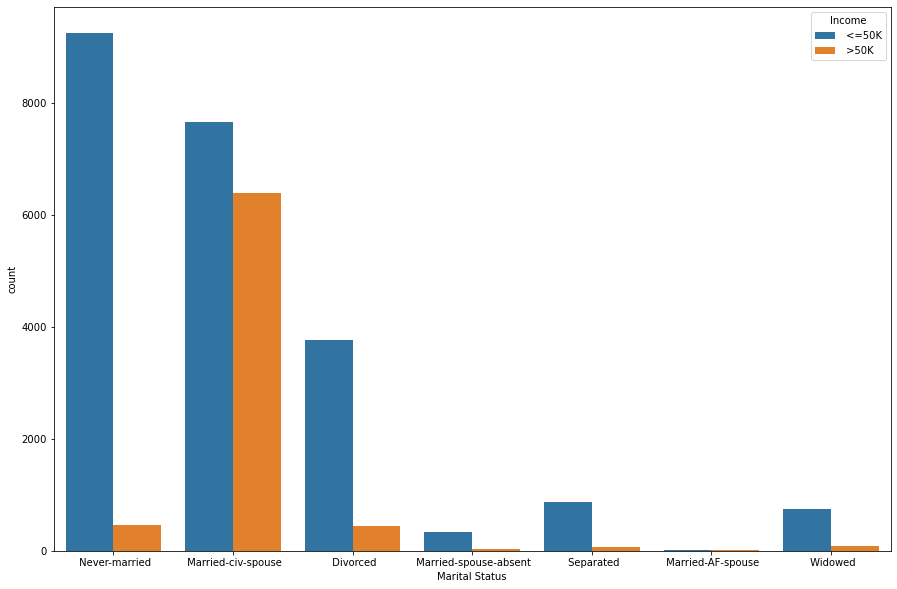

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x='Marital Status',hue = 'Income',data=df);

In [39]:
df['Relationship'].value_counts()

 Husband           12459
 Not-in-family      7726
 Own-child          4461
 Unmarried          3210
 Wife               1403
 Other-relative      889
Name: Relationship, dtype: int64

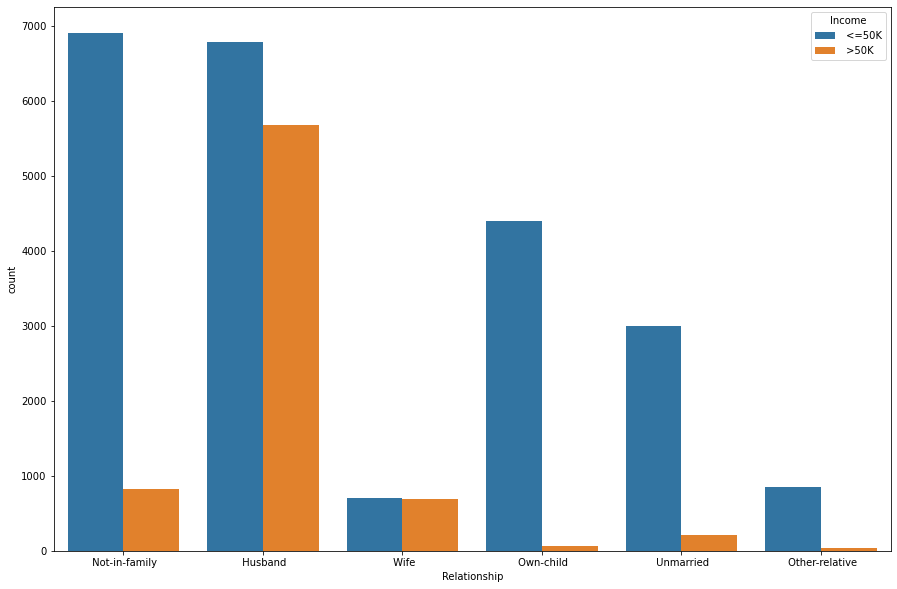

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(x='Relationship',hue = 'Income',data=df);

### Education and Education Number
It's time to check if there is any relation between Education and Education Number.

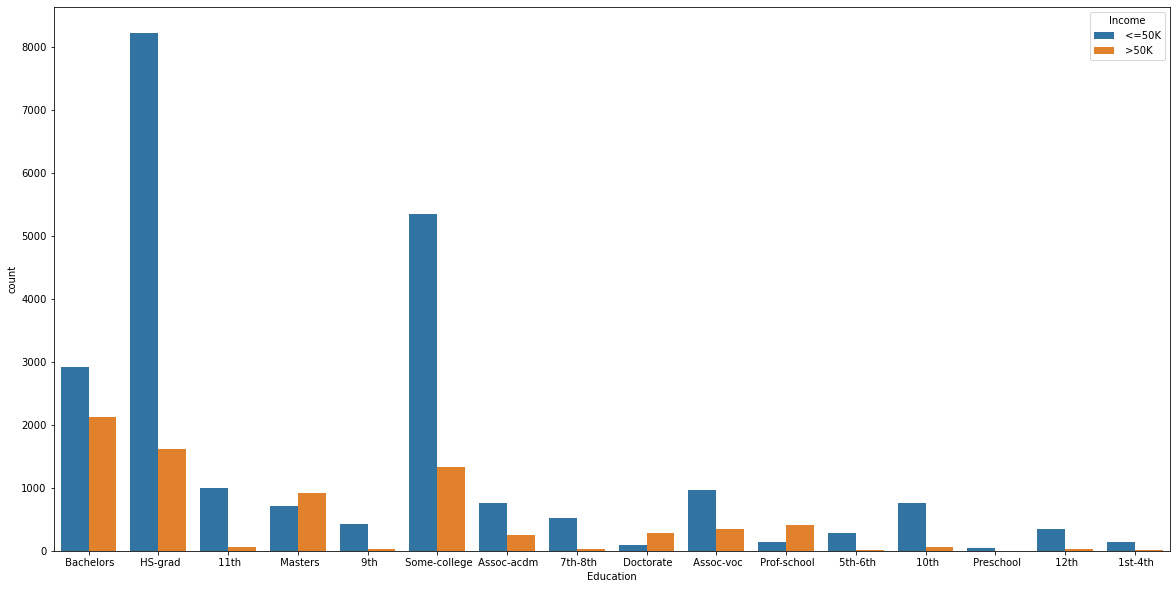

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Education', hue = 'Income', data = df);

In [42]:
edu_classes = df['Education'].unique()
for i in edu_classes:
    print("For {}, the Education Number is {}"
          .format(i, df[df['Education'] == i]['Education Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Assoc-voc, the Education Number is [11]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


From above analysis, I see that Education Number and Education are just same. Thus, I can drop any one column. Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [43]:
df.drop(['Education Number'], axis = 1, inplace = True)
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

 HS-grad         9831
 Some-college    6675
 Bachelors       5044
 School          3740
 Masters         1627
 Assoc-voc       1307
 Assoc-acdm      1007
 Prof-school      542
 Doctorate        375
Name: Education, dtype: int64

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

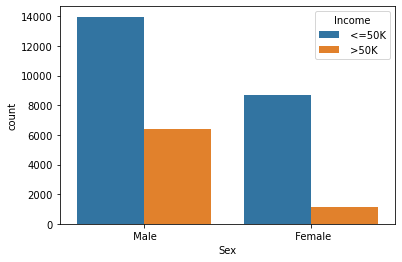

In [44]:
sns.countplot(x = 'Sex', hue = 'Income', data = df)

From above graph,

* There are more Male participants than Female participants
* When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than $50K than Females.

### Race

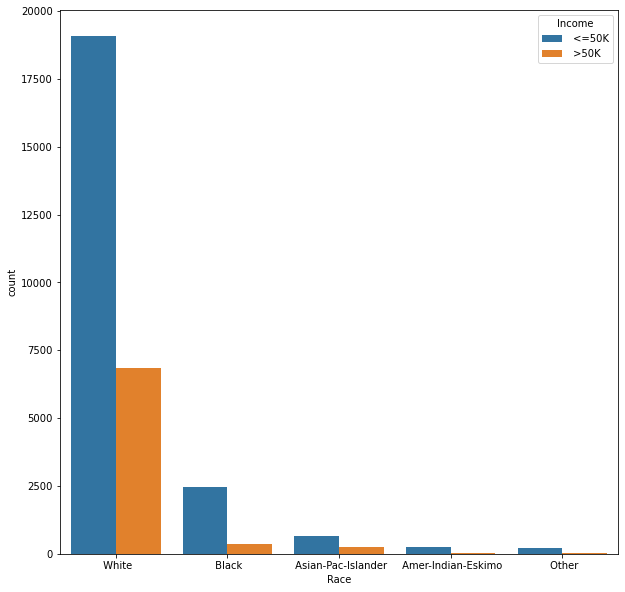

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x='Race',hue='Income',data=df);

The dataset contains majority of info about White race appart from all other races are lesser in number. I'll combine all other race data into one class name as Other.

In [46]:
df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

## Handing categorical data

In [47]:
# using get dummies
df=pd.get_dummies(df,drop_first=True)

In [48]:
df.shape

(30148, 47)

In [49]:
df.head()

,Final Weight,Age_Adult,Age_Old,Work Class_ Local-gov,Work Class_ Private,Work Class_ Self-emp-inc,Work Class_ Self-emp-not-inc,Work Class_ State-gov,Education_ Assoc-voc,Education_ Bachelors,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Hours per Week_Normal Hours,Hours per Week_large Hours,Country_Other,Income_ >50K,Capital Diff_Major
0,77516,1,0,0,0,0,0,1,0,1,...,0,0,0,1,1,1,0,0,0,0
1,83311,1,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,215646,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
3,234721,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,338409,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


our dataset read for machine learning algorirthm

# Machine Learning Algorithm

#### selection of x(independent variables) and y(Dependent variables)

In [50]:
X=df.drop('Income_ >50K',axis=1)
y = df['Income_ >50K']

### standardization
#### Applying Standard Scaler
* For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
* x_scaled = x – mean/std_dev
* However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)

##### Train Test Split : 
* To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

In [52]:
# split the data in traininig and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(std,y,test_size= 0.2,random_state=42)

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Import all machine Learning Algorithm

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
clf_knn =  KNeighborsClassifier(n_neighbors=5)
clf_svc = SVC(kernel='linear')
clf_forest = RandomForestClassifier(criterion='entropy',random_state=42)
clf_ada = AdaBoostClassifier(random_state=42)
clf_bagging = BaggingClassifier()
clf_gnb = GaussianNB()
clf_grad=GradientBoostingClassifier()

In [56]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True,test=True):
    # Fit training data with model
    clf.fit(x_train,y_train)
    # print the accuracy score, classification report and confusion matrix of classifier
    # training performance
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(x_train))))
    print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(x_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(x_train))))

    res= cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}\n\n".format(np.std(res)))

    # test performance
    print("Test Result:\n\n")
    acc=accuracy_score(y_test, clf.predict(x_test))
    print("accuracy score:",acc)
    print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(x_test))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(x_test))))    
        

In [57]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Gradient Boost', 'Naive']
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_grad: 'Gradient Boost',
          clf_gnb: 'Naive'}

### Logistic Regression

In [58]:
print_score(clf_logreg, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.8476

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     18116
           1       0.74      0.59      0.66      6002

    accuracy                           0.85     24118
   macro avg       0.81      0.76      0.78     24118
weighted avg       0.84      0.85      0.84     24118


Confusion Matrix: 
 [[16877  1239]
 [ 2436  3566]]

Average Accuracy: 	 0.8461
Accuracy SD: 		 0.0055


Test Result:


accuracy score: 0.8451077943615257
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4524
           1       0.75      0.57      0.65      1506

    accuracy                           0.85      6030
   macro avg       0.81      0.75      0.77      6030
weighted avg       0.84      0.85      0.84      6030


Confusion Matrix: 
 [[4240  284]
 [ 650  856]]



***

### Decision Tree 

In [59]:
print_score(clf_tree, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.9995

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18116
           1       1.00      1.00      1.00      6002

    accuracy                           1.00     24118
   macro avg       1.00      1.00      1.00     24118
weighted avg       1.00      1.00      1.00     24118


Confusion Matrix: 
 [[18116     0]
 [   12  5990]]

Average Accuracy: 	 0.7953
Accuracy SD: 		 0.0131


Test Result:


accuracy score: 0.7812603648424544
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4524
           1       0.56      0.57      0.57      1506

    accuracy                           0.78      6030
   macro avg       0.71      0.71      0.71      6030
weighted avg       0.78      0.78      0.78      6030


Confusion Matrix: 
 [[3852  672]
 [ 647  859]]



***

### support vector machine

In [60]:
print_score(clf_svc, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.8423

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     18116
           1       0.76      0.54      0.63      6002

    accuracy                           0.84     24118
   macro avg       0.81      0.74      0.76     24118
weighted avg       0.83      0.84      0.83     24118


Confusion Matrix: 
 [[17087  1029]
 [ 2774  3228]]

Average Accuracy: 	 0.8412
Accuracy SD: 		 0.0048


Test Result:


accuracy score: 0.8361525704809287
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      4524
           1       0.75      0.51      0.61      1506

    accuracy                           0.84      6030
   macro avg       0.80      0.73      0.75      6030
weighted avg       0.83      0.84      0.82      6030


Confusion Matrix: 
 [[4269  255]
 [ 733  773]]



***

### KNN

In [61]:
print_score(clf_knn, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.8745

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     18116
           1       0.77      0.70      0.73      6002

    accuracy                           0.87     24118
   macro avg       0.84      0.82      0.83     24118
weighted avg       0.87      0.87      0.87     24118


Confusion Matrix: 
 [[16898  1218]
 [ 1809  4193]]

Average Accuracy: 	 0.8263
Accuracy SD: 		 0.0073


Test Result:


accuracy score: 0.8248756218905473
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4524
           1       0.67      0.58      0.62      1506

    accuracy                           0.82      6030
   macro avg       0.77      0.74      0.75      6030
weighted avg       0.82      0.82      0.82      6030


Confusion Matrix: 
 [[4100  424]
 [ 632  874]]



***

### Random Forest classifier

In [62]:
print_score(clf_forest, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.9995

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18116
           1       1.00      1.00      1.00      6002

    accuracy                           1.00     24118
   macro avg       1.00      1.00      1.00     24118
weighted avg       1.00      1.00      1.00     24118


Confusion Matrix: 
 [[18111     5]
 [    8  5994]]

Average Accuracy: 	 0.8181
Accuracy SD: 		 0.0104


Test Result:


accuracy score: 0.8174129353233831
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4524
           1       0.65      0.59      0.62      1506

    accuracy                           0.82      6030
   macro avg       0.76      0.74      0.75      6030
weighted avg       0.81      0.82      0.81      6030


Confusion Matrix: 
 [[4041  483]
 [ 618  888]]



***

### Naive Bayes

In [63]:
print_score(clf_gnb, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.7723

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83     18116
           1       0.53      0.86      0.65      6002

    accuracy                           0.77     24118
   macro avg       0.73      0.80      0.74     24118
weighted avg       0.84      0.77      0.79     24118


Confusion Matrix: 
 [[13462  4654]
 [  838  5164]]

Average Accuracy: 	 0.7567
Accuracy SD: 		 0.0378


Test Result:


accuracy score: 0.7741293532338308
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.75      0.83      4524
           1       0.53      0.85      0.65      1506

    accuracy                           0.77      6030
   macro avg       0.73      0.80      0.74      6030
weighted avg       0.84      0.77      0.79      6030


Confusion Matrix: 
 [[3391 1133]
 [ 229 1277]]



***

## Ensemble Techniques

### BaggingClassifier

In [64]:
print_score(clf_bagging, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.9822

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     18116
           1       0.99      0.94      0.96      6002

    accuracy                           0.98     24118
   macro avg       0.98      0.97      0.98     24118
weighted avg       0.98      0.98      0.98     24118


Confusion Matrix: 
 [[18044    72]
 [  357  5645]]

Average Accuracy: 	 0.8192
Accuracy SD: 		 0.0088


Test Result:


accuracy score: 0.8175787728026535
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      4524
           1       0.66      0.55      0.60      1506

    accuracy                           0.82      6030
   macro avg       0.76      0.73      0.74      6030
weighted avg       0.81      0.82      0.81      6030


Confusion Matrix: 
 [[4107  417]
 [ 683  823]]



***

### AdaBoostClassifier,

In [65]:
print_score(clf_ada, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.8455

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     18116
           1       0.73      0.60      0.66      6002

    accuracy                           0.85     24118
   macro avg       0.80      0.76      0.78     24118
weighted avg       0.84      0.85      0.84     24118


Confusion Matrix: 
 [[16789  1327]
 [ 2399  3603]]

Average Accuracy: 	 0.8438
Accuracy SD: 		 0.0058


Test Result:


accuracy score: 0.8439469320066335
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4524
           1       0.74      0.57      0.65      1506

    accuracy                           0.84      6030
   macro avg       0.81      0.75      0.77      6030
weighted avg       0.84      0.84      0.84      6030


Confusion Matrix: 
 [[4227  297]
 [ 644  862]]



***

### GradientBoostingClassifier

In [66]:
print_score(clf_grad, x_train, y_train, x_test, y_test, train=True,test=True)

Train Result:

accuracy score: 0.8489

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     18116
           1       0.75      0.59      0.66      6002

    accuracy                           0.85     24118
   macro avg       0.81      0.76      0.78     24118
weighted avg       0.84      0.85      0.84     24118


Confusion Matrix: 
 [[16926  1190]
 [ 2454  3548]]

Average Accuracy: 	 0.8455
Accuracy SD: 		 0.0058


Test Result:


accuracy score: 0.8454394693200663
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4524
           1       0.76      0.56      0.65      1506

    accuracy                           0.85      6030
   macro avg       0.81      0.75      0.77      6030
weighted avg       0.84      0.85      0.84      6030


Confusion Matrix: 
 [[4250  274]
 [ 658  848]]



***

In [85]:
from sklearn.metrics import accuracy_score
def main(models):
    Test_scores= []
    for algo,name in models.items():
        acc_score=accuracy_score(y_test,algo.predict(x_test))
        Test_scores.append(acc_score)
    return Test_scores
    
Test_scores= main(models)    

### comparison of all algorithm

In [86]:
accuracy=pd.DataFrame(Test_scores,columns = ['Testing Accuracy'],index = classifiers).sort_values(by = 'Testing Accuracy',
                                                                                            ascending = False)
accuracy

,Testing Accuracy
Gradient Boost,0.845439
LogisticRegression,0.845108
Adaboost,0.843947
SVC,0.836153
KNN,0.824876
Bagging,0.817579
RandomForest,0.817413
DecisionTree,0.781260
Naive,0.774129


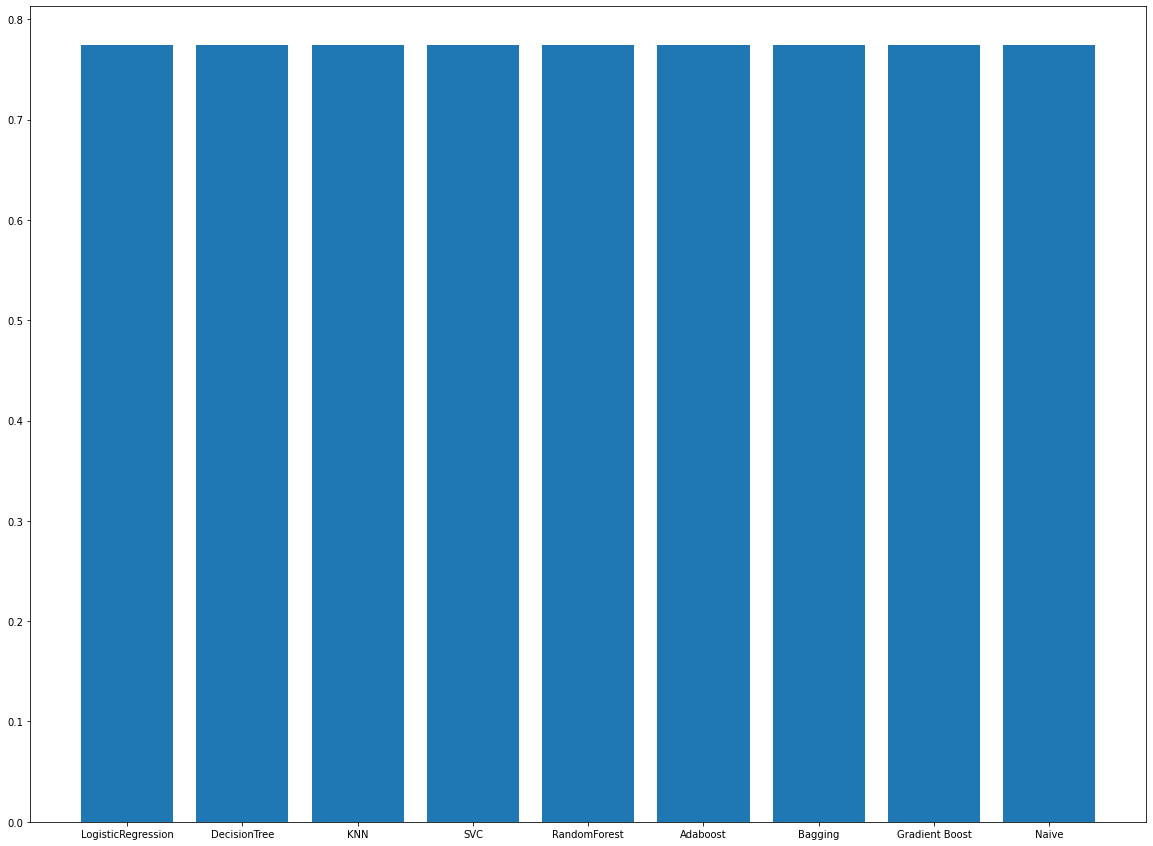

In [87]:
plt.figure(figsize=(20,15))
plt.bar(data=accuracy,x=classifiers,height=Test_accuraccy);

As it can be seen from the plot above, the Gradient Boosting Classifier had the best accuracy. Graphs make representing information really easy and intuitive.

***

## Predicting values from Model using same dataset

In [88]:
#Actual value and the predicted value
clf_diff= pd.DataFrame({'Actual value': y_test, 'Predicted value': clf_grad.predict(x_test)})
clf_diff.head(10)

,Actual value,Predicted value
14503,0,0
13714,1,1
14027,1,0
3650,0,0
18583,0,0
10741,0,0
2480,0,0
17073,0,0
28919,1,0
4957,0,0


#### I collected this data from the UCI Machine Learning repository, and then interpreted each feature individually. I used different types Machine Learning algorithm and concluded with an Accuracy of 84.52% and F1 Score of 0.65 with Gradient Boosting Classifier.


### *** ♡ Thank you for taking the time ♡ ***